# Линейная регрессия

* Какие проблемы решает линейная регрессия

* Линейные функции

* Функция потерь

* Производная

* Градиентный спуск

* Реализация на Python и NumPy

## Почему мы изучаем линейную регрессию, а не глубокие нейронные сети? 

* Легка для понимания 

* Можно рассмотреть основные идеи машинного обучения

* До сих пор применяется

## Постановка задачи 

$X$ - часть свободного времени которые студенты тратят на учебу. 

$y$ - средняя оценка студента по всем предметам.

Наша задача найти зависимость между $Х$ и $y$. То есть, нужно найти функцию $f(X) = y$.

## Постановка задачи

Можно представить, что пары значений данных ($X_i$, $y_i$) - это значения функции $f(X)$ в точках $X_i$. И задача регрессии — это построить функцию (некую линию) которая может *описать* эти данные.

Например, студент тратит 0.1 свободного времени на учебу. 

$f(0.1) = 3$. *Ответ: студент полуичит оценку $3$*.

То есть, необходимо по имеющимся данным построить зависимость интересующей нас переменной от каких то других параметров.

В общем случае задача регрессии - это по входным данным найти число в каком-то *непрерывном* диапазоне. Например: $(-1, 1)$ или же $R$.

## Другой пример регрессии 

* Предсказание количество посетителей в интересующие нас время в интернет магазине.

* Предсказание цены квартиры в зависимости от площади 

## Загрузка данных

Рассмотрим подробнее пример с $Х$ и $y$.

In [1]:
from regression_helper import * # Подгружаем функции для визуализации
import numpy as np              # Подгруджаем библиотеку NumPy

X, y = get_data()               # Загружаем данные в X и y

После этого в векторе $X$ содержится доля свободного времени студента, потраченная на учебу, а в векторе $y$ средняя оценка. 

## Визуализация данных

In [2]:
visualize_Xy(X, y)    

    Доля свободного времени, потраченного на учебу  Средняя оценка
0                                             0.10            3.18
1                                             0.12            4.80
2                                             0.13            3.31
3                                             0.13            4.18
4                                             0.14            4.03
5                                             0.18            5.08
6                                             0.21            5.31
7                                             0.26            5.35
8                                             0.26            5.61
9                                             0.26            5.52
10                                            0.28            6.31
11                                            0.29            6.64
12                                            0.29            5.47
13                                            0.35            

$X$ и $y$ - это массивы NumPy ndarray с 20 элементами. 

## Подробнее про $X$ и $y$

Тип $X$ и $y$.

In [3]:
print(f"Тип переменной X: {type(X)}")
print(f"Тип переменной y: {type(y)}")

Тип переменной X: <class 'numpy.ndarray'>
Тип переменной y: <class 'numpy.ndarray'>


Значения массива X:

In [4]:
print(X)

[0.1  0.12 0.13 0.13 0.14 0.18 0.21 0.26 0.26 0.26 0.28 0.29 0.29 0.35
 0.35 0.43 0.46 0.47 0.48 0.48]


Значения массива y:

In [5]:
print(y)

[3.18 4.8  3.31 4.18 4.03 5.08 5.31 5.35 5.61 5.52 6.31 6.64 5.47 7.83
 7.63 9.04 9.11 9.83 9.42 8.71]


$X_i$ в тексте - это ***X[i]*** в коде.

In [6]:
print(X[0])

0.1


In [7]:
print(X)

[0.1  0.12 0.13 0.13 0.14 0.18 0.21 0.26 0.26 0.26 0.28 0.29 0.29 0.35
 0.35 0.43 0.46 0.47 0.48 0.48]


## Визуализация данных

Отобразим эти данные на графике. Черные точки - это пары $X_i$, $у_i$.

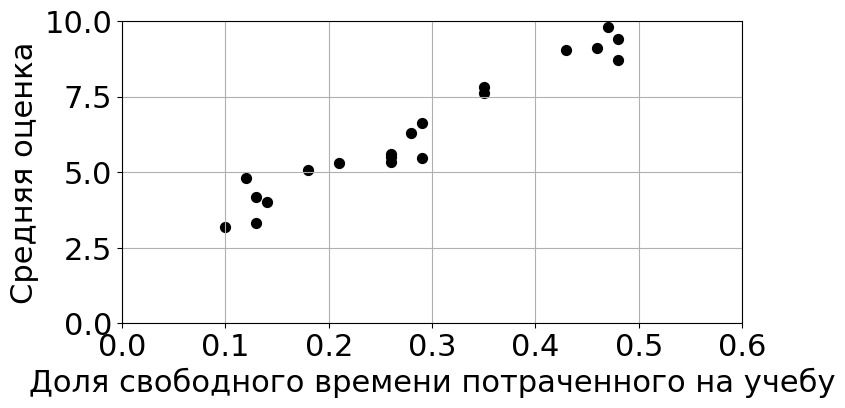

In [8]:
# Строим график с точками
plot_data(X, y)      

Между этими данными есть зависимость.

Точки примерно лежат на одной линии с неким "шумом".

## Наша задача

Найти такую функицю (линию), которая максимально точно может описать данные.